<a href="https://colab.research.google.com/github/RMDircio/Study-Guides/blob/master/Filled_Out_Unit_4_Sprint_2_Neural_Networks_Study_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This study guide should reinforce and provide practice for all of the concepts you have seen in the past week. There are a mix of written questions and coding exercises, both are equally important to prepare you for the sprint challenge as well as to be able to speak on these topics comfortably in interviews and on the job.

If you get stuck or are unsure of something remember the 20 minute rule. If that doesn't help, then research a solution with google and stackoverflow. Only once you have exausted these methods should you turn to your Team Lead - they won't be there on your SC or during an interview. That being said, don't hesitate to ask for help if you truly are stuck.

Have fun studying!

# Neural Networks by Hand

## Definitions

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*

**Input Layer:** `Your Answer Here`

**Hidden Layer:** `Your Answer Here`

**Output Layer:** `Your Answer Here`

**Neuron:** `Your Answer Here`

**Weight:** `Your Answer Here`

**Bias:** `Your Answer Here`

**Activation Function:** `Your Answer Here`

**Node Map:** `Your Answer Here`

**Perceptron:** `Your Answer Here`

**Epoch:** `Your Answer Here`

**Feed Forward Neural Network:** `Your Answer Here`

**Back Propagation:** `Your Answer Here`

## Questions of Understanding


1. Name 2 activation functions and when they might be used
 1. `Your Answer Here`
 2. `Your Answer Here`

2. What types of machine learning problems are neural networks best suited for?
```
Your Answer Here
```

3. In a linear regression problem, we can attempt to account for nonlinear features with polynomial features. What problem do we encounter as our feature size increases? How does a neural network avoid/address this issue?
```
Your Answer Here
```

4. What are some of the tradeoffs of using a neural network versus a traditional machine learning algorithm like linear regression or a decision tree?
```
Your Answer Here
```

5. What determines the size of the input layer?
```
Your Answer Here
```

## Perceptrons

Use the starter code below to build a perceptron, with just numpy, to predict whether a passenger survived or not. You may reduce the number of features for X to fit code you have already worked on throughout the week, but it is recommended that you modify the code instead.

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/bundickm/Study-Guides/master/data/titanic.csv')
print('Shape:', df.shape, '\n')
df.head()

Shape: (887, 7) 



,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [3]:
X = np.array(df.drop(columns='Survived'))
y = df['Survived']

In [4]:
X

array([[ 3.    ,  1.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    ,  0.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    ,  0.    ,  7.    ,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    ,  1.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [5]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(df)[1:7]

X = df[feats]
transformer = Normalizer().fit(X)
X_trans = transformer.transform(X)


In [6]:
from sklearn.model_selection import train_test_split


#Split the data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size = 0.3, random_state = 10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(620, 6) (267, 6) (620,) (267,)


In [7]:
class Perceptron:
    
    def __init__(self, rate= 0.01, niter = 10): # from gradient dencent
        self.rate = rate
        self.niter = niter
    
    def __sigmoid(self, x):
      sigmoid = 1 / (1+np.exp(-x))
      return sigmoid
    
    def __sigmoid_derivative(self, x):
      sx = sigmoid(x)
      return sx * (1-sx)

    def fit(self, X, y):
      """Fit training data
      X : Training vectors, X.shape : [#samples, #features]
      y : Target values, y.shape : [#samples]
      """

      # Randomly Initialize Weights
      self.weights = np.zeros(1 + X.shape[1])
    
      # Number of misclassifications
      self.errors = []  # Number of misclassifications

      for i in range(self.niter):
        err = 0
        for xi, target in zip(X, y):
          delta_w = self.rate * (target - self.predict(xi)) # diffeencet from target and predictions
          self.weights[1:] += delta_w * xi
          self.weights[0] += delta_w # bias
          err += int(delta_w != 0.0) # no error if target - prediction = 0
        self.errors.append(err)
      return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weights[1:]) + self.weights[0] # [0] is bias

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

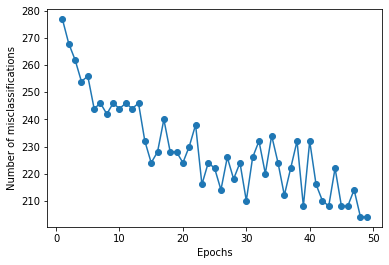

In [8]:
import matplotlib.pyplot as plt
pn = Perceptron(0.1, 49)
pn.fit(X_train, y_train)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show();



In [9]:
results= pn.predict(X_test)

In [10]:
results

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1])

In [11]:
np.array(y_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0])

Create a multilayer perceptron with back propagation, with just numpy, and apply it to the same data set.

In [12]:
'''
need to move the above model to this spot - that on
is doing backpropagation with in the function with the deltas

The one above needs to be super simple - from lecture 1

'''



'\nneed to move the above model to this spot - that on\nis doing backpropagation with in the function with the deltas\n\nThe one above needs to be super simple - from lecture 1\n\n'

*In a short paragraph, answer the following:*

Why does the multilayer perceptron perform better than the simple perceptron? What limits the simple perceptron? What aspects of the multilayer perceptron allow it to overcome those limitations?

```
Your Answer Here
```

# Keras

## Definitions

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*

**Earl Stopping:** `Your Answer Here`

**Weight Decay:** `Your Answer Here`

**Dropout:** `Your Answer Here`

<br/>
The following are hyperparameters:

**Activation Functions:** `Your Answer Here`

**Optimizer** `Your Answer Here`

**Number of Layers** `Your Answer Here`

**Number of Neurons** `Your Answer Here`

**Batch Size** `Your Answer Here`

**Dropout Regularization** `Your Answer Here`

**Learning Rate** `Your Answer Here`

**Number of Epochs** `Your Answer Here`

## Questions of Understanding


1. Why is it recommended to normalize your input data?
```
Your Answer Here
```

2. How do you go about deciding on your neural network's architecture?
```
Your Answer Here
```

3. Why is regularization important with neural networks?
```
Your Answer Here
```

4. What does `validation.data` do?
```
Your Answer Here
```

5. Why is hyperparameter tuning so important with neural networks?
```
Your Answer Here
```

## Modeling

Using the same dataset as above, use Keras to build a model and find its accuracy.

Build upon the model you created in the cell above by adding hyperparameter tuning.

Find the accuracy of the tuned model.

In a short paragraph, explain how the hyperparameters impacted the accuracy of your model.

```
You Answer Here
```